### Analysis of 60Co correlation data

In [1]:
import sys
sys.path.insert(0,'python/')
import struct
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from Co60Analysis import *

#%load_ext snakeviz

#### Select the runs you wish to analyze

In [2]:
runs = ['C:/data/20220120_154253/']

#### Processing.....

1. instantiate the Co60Analysis class
2. loop over all the data

In [12]:
# 1....
myCo60 = Co60Analysis(runs=runs, dt_max=10)
# 2....
#%snakeviz 
myCo60.process_data(max_files=20)

DT5550:: no data files specified.... re-initialize before use
Co60Analysis:: Begin processing data....
DT5550:: Data recorded with config:  C:/data/20220120_154253\config_20220120_154253.json
DT5550:: Open data file: C:/data/20220120_154253\data_20220120_154253_0.raw
DT5550:: Open data file: C:/data/20220120_154253\data_20220120_154253_1.raw
DT5550:: Open data file: C:/data/20220120_154253\data_20220120_154253_2.raw
DT5550:: Open data file: C:/data/20220120_154253\data_20220120_154253_3.raw
DT5550:: Open data file: C:/data/20220120_154253\data_20220120_154253_4.raw
DT5550:: Open data file: C:/data/20220120_154253\data_20220120_154253_5.raw
DT5550:: Open data file: C:/data/20220120_154253\data_20220120_154253_6.raw
DT5550:: Open data file: C:/data/20220120_154253\data_20220120_154253_7.raw
DT5550:: Open data file: C:/data/20220120_154253\data_20220120_154253_8.raw
DT5550:: Open data file: C:/data/20220120_154253\data_20220120_154253_9.raw
DT5550:: Open data file: C:/data/20220120_154253

#### Analyzing

1. calculate the rate corrections from the tags with the reference detector
2. tag and count events
3. fit the 4th order legendre polynomial to verify the $^{60}$Ni spin structure

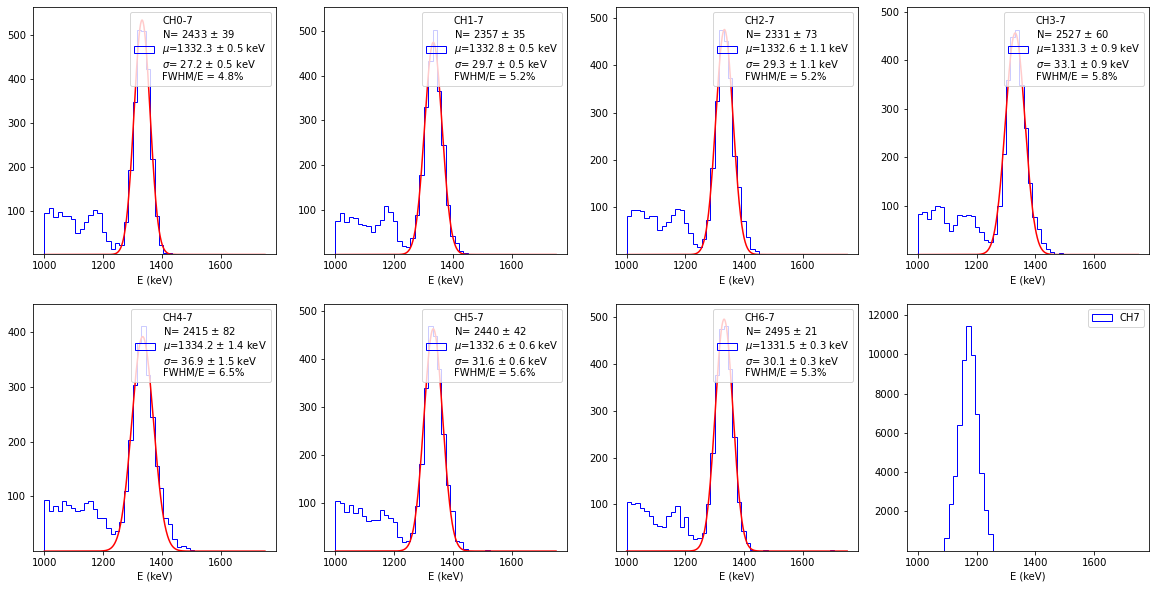

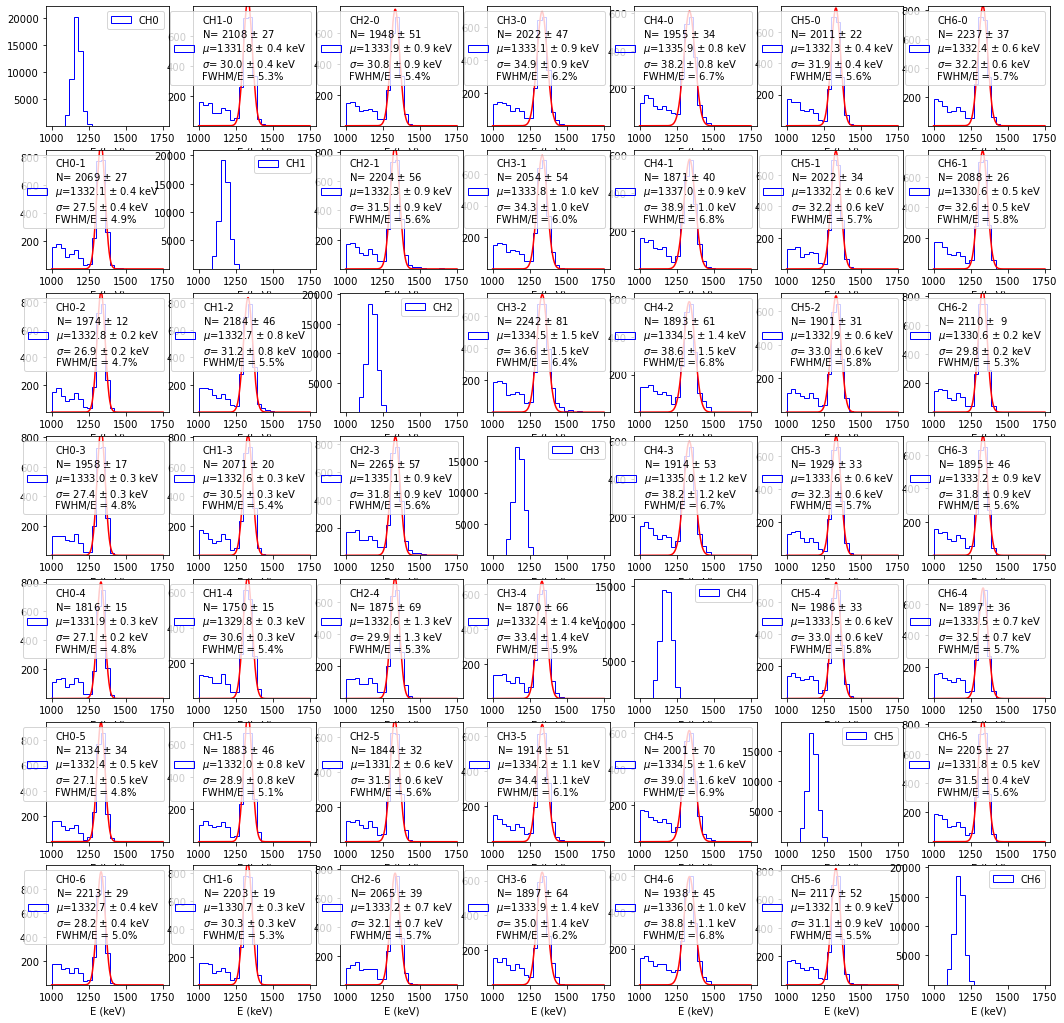

In [38]:
tag = '1173keV' # 1173keV # 1332keV
myCo60.dt_max = 10
# calculate the corrections
myCo60.calculate_corrections(tagged_peak=tag, range=(1000, 1750), bins=50)
# calculate the correlations
# myCo60.rate_correction = np.array([9.63139783e-01, 9.32982903e-01, 9.22583238e-01, 1.00000000e+00,
#        9.55735692e-01, 9.65884391e-01, 9.87639518e-01, 3.95785959e-04])

myCo60.rate_correction = np.ones(8)
myCo60.correlation_analysis(tagged_peak=tag, range=(1000,1750), bins=25)

[45.91508242 44.13178673 44.96493162 44.22073067 44.84673316 47.29440648
 45.48414043 46.94463411 45.32575535 43.25630143 44.96878492 45.69353888
 44.43457914 46.73103457 47.34726744 43.50347092 43.5969456  45.93753887
 44.24457303 45.50694651 47.59142122 43.74689004 43.92504212 43.53092118
 42.61777603 41.8382796  43.29890018 43.24500592 44.56731579 43.5553759
 46.1988742  43.39145705 42.9453216  43.74605823 44.73633971 46.95931511
 47.04601092 46.9330427  45.44753645 43.55019938 44.01723884 46.01062236]
[14.512283829072123, 22.49691988622066, 18.009255679078752, 21.80357760080063, 33.35449005584384, 23.57739300047496, 21.489671927070567, 30.598179327658258, 30.756791627320798, 30.99647937818079, 31.573666746167245]


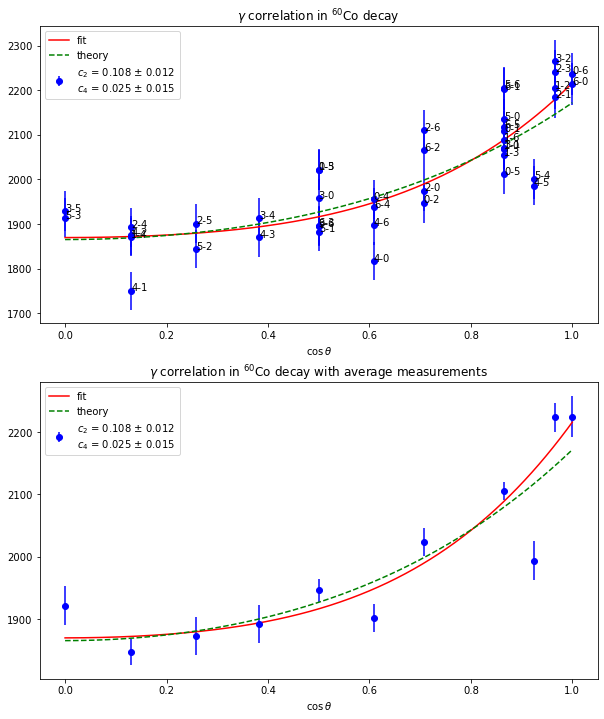

In [39]:
myCo60.correlation_fit()

In [21]:
dummy = myCo60.rate_correction

In [20]:
myCo60.rate_correction = myCo60.rate_correction/max(dummy)

In [22]:
dummy

array([9.63139783e-01, 9.32982903e-01, 9.22583238e-01, 1.00000000e+00,
       9.55735692e-01, 9.65884391e-01, 9.87639518e-01, 3.95785959e-04])

In [26]:
dummy

array([2.43348649e+03, 2.35729157e+03, 2.33101558e+03, 2.52661818e+03,
       2.41477918e+03, 2.44042106e+03, 2.49538796e+03, 3.95785959e-04])